In [1]:
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gzip
%matplotlib inline

In [2]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [3]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
output_mapping = { 0: "T-shirt/Top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker",
                 8: "Bag", 9: "Ankle Boot"}

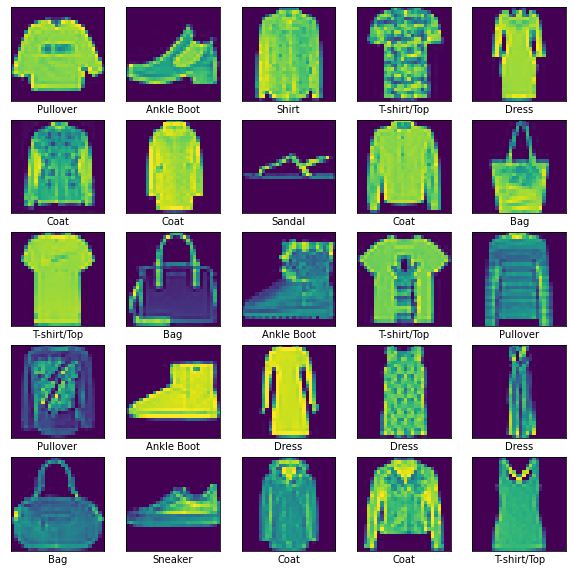

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train.iloc[i, 1:].values.reshape(28,28))
    plt.xlabel(output_mapping[train.iloc[i, 0]])
plt.show()

In [6]:
train_image = np.array(train.iloc[:,1:])
train_image = train_image/255 
train_label = np.array(train.iloc[:, 0])
test_image = np.array(test.iloc[:,1:])
test_image = test_image/255
test_label = np.array(test.iloc[:, 0])

## Deep Neural Network

In [7]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(784,activation='relu'))
model.add(layers.Dense(400,activation='relu'))
model.add(layers.Dense(300,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(10,activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_image, train_label, epochs = 30, batch_size=32, validation_data=(test_image, test_label))

Epoch 1/30
1875/1875 [==============================] - 85s 15ms/step - loss: 0.6434 - accuracy: 0.7688 - val_loss: 0.3890 - val_accuracy: 0.8593
Epoch 2/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4031 - accuracy: 0.8540 - val_loss: 0.3564 - val_accuracy: 0.8709
Epoch 3/30
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3506 - accuracy: 0.8743 - val_loss: 0.3667 - val_accuracy: 0.8692
Epoch 4/30
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3242 - accuracy: 0.8830 - val_loss: 0.3345 - val_accuracy: 0.8820
Epoch 5/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3046 - accuracy: 0.8883 - val_loss: 0.3341 - val_accuracy: 0.8757
Epoch 6/30
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2897 - accuracy: 0.8948 - val_loss: 0.3345 - val_accuracy: 0.8809
Epoch 7/30
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2818 - accuracy: 0.8950 - val_loss: 0.3266 -

In [10]:
predictions = model.predict(test_image)

In [11]:
model.evaluate(test_image, test_label)

313/313 [==============================] - 2s 5ms/step - loss: 0.4575 - accuracy: 0.8999


[0.45745542645454407, 0.8999000191688538]

In [12]:
def visualize_pred(image, pred_prob, actual_label):
    fig, (ax1, ax2) = plt.subplots(figsize=(4,8), ncols=2)
    ax1.imshow(image.reshape(28, 28).squeeze())
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([output_mapping[actual_label], output_mapping[pred_label]])
    ax2.barh(np.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

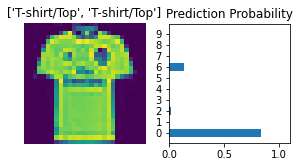

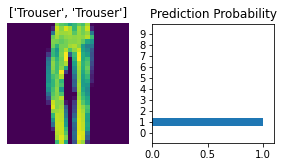

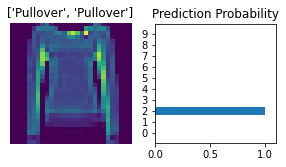

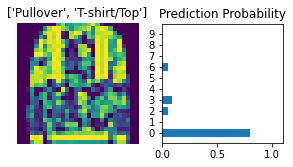

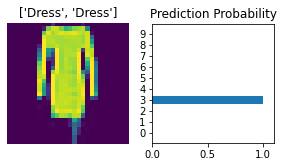

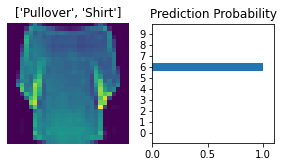

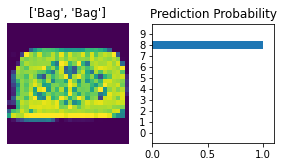

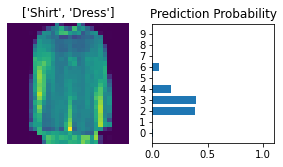

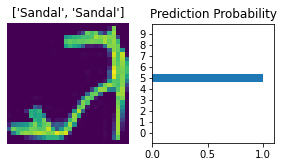

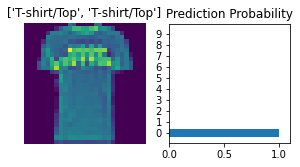

In [13]:
for i in range(10):
    visualize_pred(test_image[i],predictions[i],test_label[i])

## Deep Neural Network with Dropout

In [14]:
modelwithdropout = models.Sequential()
modelwithdropout.add(layers.Flatten())
modelwithdropout.add(layers.Dropout(0.25))
modelwithdropout.add(layers.Dense(784,activation='relu'))
modelwithdropout.add(layers.Dropout(0.25))
modelwithdropout.add(layers.Dense(400,activation='relu'))
modelwithdropout.add(layers.Dropout(0.25))
modelwithdropout.add(layers.Dense(300,activation='relu'))
modelwithdropout.add(layers.Dropout(0.25))
modelwithdropout.add(layers.Dense(200,activation='relu'))
modelwithdropout.add(layers.Dropout(0.25))
modelwithdropout.add(layers.Dense(100,activation="relu"))
modelwithdropout.add(layers.Dense(10,activation='softmax'))

In [15]:
modelwithdropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
modelwithdropout.fit(train_image, train_label, epochs = 30, batch_size=32, validation_data=(test_image, test_label))

Epoch 1/30
1875/1875 [==============================] - 36s 16ms/step - loss: 0.8409 - accuracy: 0.6788 - val_loss: 0.4640 - val_accuracy: 0.8319
Epoch 2/30
1875/1875 [==============================] - 31s 17ms/step - loss: 0.5005 - accuracy: 0.8200 - val_loss: 0.4272 - val_accuracy: 0.8393
Epoch 3/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4665 - accuracy: 0.8321 - val_loss: 0.3972 - val_accuracy: 0.8571
Epoch 4/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4405 - accuracy: 0.8419 - val_loss: 0.3912 - val_accuracy: 0.8629
Epoch 5/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4218 - accuracy: 0.8482 - val_loss: 0.3713 - val_accuracy: 0.8597
Epoch 6/30
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4101 - accuracy: 0.8501 - val_loss: 0.3478 - val_accuracy: 0.8734
Epoch 7/30
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4079 - accuracy: 0.8528 - val_loss: 0.3529 -

In [17]:
predictionswithdropout = modelwithdropout.predict(test_image)

In [18]:
modelwithdropout.evaluate(test_image, test_label)

313/313 [==============================] - 2s 5ms/step - loss: 0.3017 - accuracy: 0.8904


[0.30173438787460327, 0.8903999924659729]

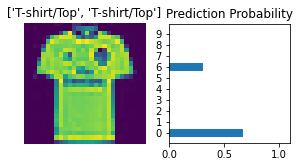

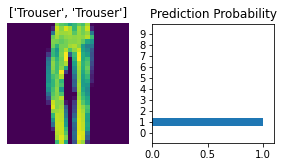

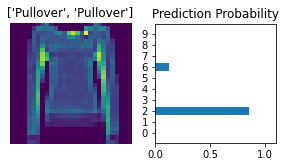

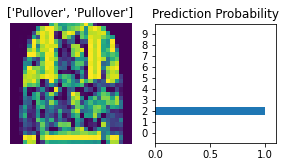

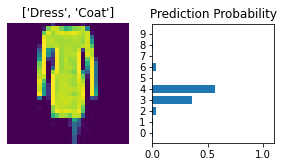

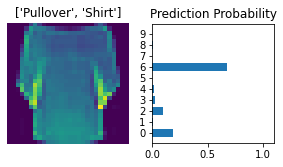

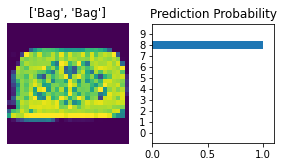

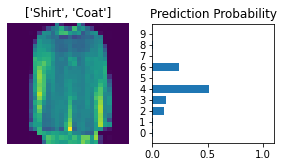

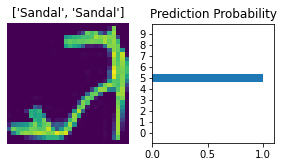

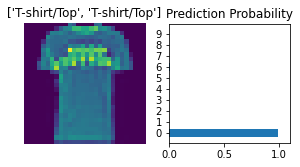

In [19]:
for i in range(10):
    visualize_pred(test_image[i],predictionswithdropout[i],test_label[i])

## Does Deep Neural Network use Visual Information? What happens if we permute the pixel randomly for all images?

In [20]:
permutation = torch.randperm(784)

In [21]:
def blurr_images(arr):
    new_arr = []
    for i in range(len(arr)):
        newimage = arr[i].flatten()
        newimage = newimage[permutation]
        newimage = newimage.reshape(28,28)
        new_arr.append(newimage)
    return np.asarray(new_arr)

In [22]:
blurr_train_image = blurr_images(train_image)
blurr_test_image = blurr_images(test_image)

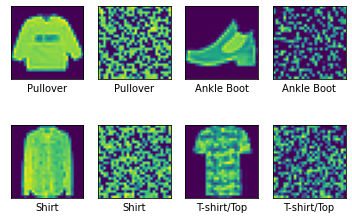

In [23]:
for i in range(4):
    plt.subplot(2,4 , 2*i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i].reshape(28,28))
    plt.xlabel(output_mapping[train_label[i]])
    plt.subplot(2,4 , 2*i + 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(blurr_train_image[i].reshape(28,28))
    plt.xlabel(output_mapping[train_label[i]])
plt.show()

In [24]:
blurrmodel = models.Sequential()
blurrmodel.add(layers.Flatten())
blurrmodel.add(layers.Dense(784,activation='relu'))
blurrmodel.add(layers.Dense(400,activation='relu'))
blurrmodel.add(layers.Dense(300,activation='relu'))
blurrmodel.add(layers.Dense(200,activation='relu'))
blurrmodel.add(layers.Dense(100,activation="relu"))
blurrmodel.add(layers.Dense(10,activation='softmax'))

In [25]:
blurrmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
blurrmodel.fit(blurr_train_image, train_label, epochs = 30, batch_size=32, validation_data=(blurr_test_image, test_label))

Epoch 1/30
1875/1875 [==============================] - 30s 14ms/step - loss: 0.6452 - accuracy: 0.7613 - val_loss: 0.4217 - val_accuracy: 0.8491
Epoch 2/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3922 - accuracy: 0.8588 - val_loss: 0.3778 - val_accuracy: 0.8640
Epoch 3/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3500 - accuracy: 0.8725 - val_loss: 0.3550 - val_accuracy: 0.8684
Epoch 4/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3320 - accuracy: 0.8806 - val_loss: 0.3482 - val_accuracy: 0.8747
Epoch 5/30
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3017 - accuracy: 0.8908 - val_loss: 0.3324 - val_accuracy: 0.8799
Epoch 6/30
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2859 - accuracy: 0.8932 - val_loss: 0.3139 - val_accuracy: 0.8850
Epoch 7/30
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2749 - accuracy: 0.8993 - val_loss: 0.3261 -

In [27]:
blurrpredictions = blurrmodel.predict(blurr_test_image)

In [28]:
blurrmodel.evaluate(blurr_test_image, test_label)

313/313 [==============================] - 2s 6ms/step - loss: 0.3955 - accuracy: 0.8924


[0.39547979831695557, 0.8924000263214111]

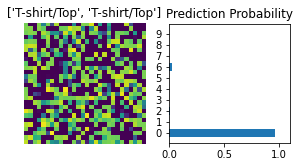

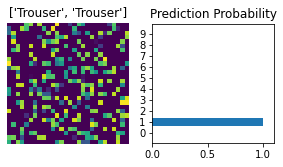

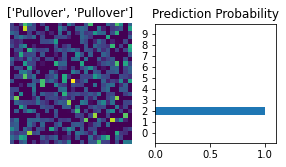

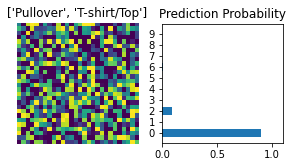

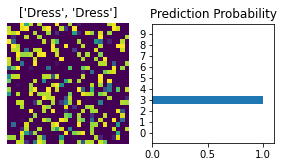

In [29]:
for i in range(5):
    visualize_pred(blurr_test_image[i], blurrpredictions[i],test_label[i])

#### So, we can clearly see here, Deep Neural Network does not use Visual Information.